In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set_palette("GnBu_d")
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
from pathlib import Path

import geopy
from geopy.geocoders import GoogleV3
from geopy.distance import geodesic

In [2]:
df_cluster = pd.read_csv("../boston_2016_prep_cluster.csv")
# df_cluster = df

In [3]:
len(df_cluster)

1227562

In [4]:
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

613781

In [5]:
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

306890

In [6]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

153445

In [7]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

76722

In [8]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

38361

In [9]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

19180

In [10]:
df_cluster.drop(['level_0'], axis=1, inplace=True)
df_cluster = df_cluster.drop(df_cluster[df_cluster.index % 2 == 0].index)
df_cluster = df_cluster.reset_index()
len(df_cluster)

9590

### 1.5) Clustering

In [11]:
df_cluster.head(1)

,level_0,index,Unnamed: 0,Unnamed: 0.1,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,...,start_coordinates,end_coordinates,distance_km,duration_sec,speed_kmh,start_distance_center,end_distance_center,start_hour,weekday_start,weekday_end
0,1,127,133,133,2016-01-01 15:37:34,2016-01-01 15:41:59,178,68,MIT Pacific St at Purrington St,Central Square at Mass Ave / Essex St,...,"(42.35957320109044, -71.10129475593567)","(42.36507, -71.1031)",0.628436,265.0,8.53724,3.568588,3.751808,15,4,4


We can see that over time our dataframe has become quite feature rich

But for clustering we can only use a handful of features, therefore the following columns need to be dropped:

`start_time, end_time:` we use the start hour and duration of a trip instead

`start_station_id, end_station_id, start_station_name, end_station_name:` hold no valuable information for clustering

`bike_id:` we are focusing on trips and not the different bikes

`start_coordinates, end_coordinates:` can not be used for clustering as the algorithms can not know what these coordinates mean - instead we are using start_distance_center and end_distance_center

In [12]:
df_cluster.drop(['Unnamed: 0.1','index','level_0','Unnamed: 0','start_time','end_time','start_station_id','end_station_id','start_station_name','end_station_name','bike_id','start_coordinates','end_coordinates','weekday_end'], axis=1, inplace=True)

In [13]:
df_customer = df_cluster.drop(df_cluster[df_cluster['user_type'] == "Subscriber"].index)
df_subscriber = df_cluster.drop(df_cluster[df_cluster['user_type'] == "Customer"].index)

In [14]:
len(df_customer)

1945

In [15]:
len(df_subscriber)

7645

In [16]:
df_cluster['user_type'] = df_cluster['user_type'].replace(['Customer','Subscriber'],[0,1])
# user_type:
# 0 = Customer
# 1 = Subscriber

df_customer.drop(['user_type'], axis=1, inplace=True)
df_subscriber.drop(['user_type'], axis=1, inplace=True)

In [17]:
# df_cluster['weekday_start'] = df_cluster['weekday_start'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# df_cluster['weekday_end'] = df_cluster['weekday_end'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# 0 -> workday
# 1 -> weekend 

In [18]:
# df_cluster.drop(['duration_sec'], axis=1, inplace=True)
# df_cluster = df_cluster.drop(df_cluster[df_cluster['duration_sec'] > 7200].index)
# df_cluster.drop(['speed_kmh'], axis=1, inplace=True)
# df_cluster.drop('start_hour', axis=1, inplace=True)
# df_cluster.drop("user_type", axis=1, inplace=True)
# df_cluster.drop('weekday_start', axis=1, inplace=True) 

In [19]:
numbers = ["zero", "one", "two", "three","four","five","six"]

In [20]:
from sklearn.cluster import KMeans

#### Customer Cluster

In [21]:
XC = df_customer

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(XC)
XC_scaled = scaler.transform(XC)

# create a df out of array
XC_scaled_df = pd.DataFrame(XC_scaled, columns=XC.columns, index=XC.index)
XC_scaled_df.head(10)

,distance_km,duration_sec,speed_kmh,start_distance_center,end_distance_center,start_hour,weekday_start
4,-0.521995,-0.796435,0.747033,-0.199722,0.467197,0.863321,1.322905
5,-0.579998,-0.767644,0.444609,0.301353,0.597031,-0.961852,-1.642008
6,-0.579998,-0.803865,0.639174,0.550083,0.345578,0.635174,-1.642008
8,-0.980750,-0.847515,-0.263302,1.464798,1.437890,0.407028,-1.147855
12,-0.843779,-0.843800,0.124180,-0.614257,-0.308077,0.863321,-0.653703
17,-0.026318,-0.517814,0.515856,0.686906,1.592318,-1.646291,0.334601
37,-0.722059,-0.910669,0.980106,0.042054,0.597031,-0.277412,-0.159551
50,-0.369195,-0.411939,-0.239168,0.019368,-0.580058,0.178881,-1.147855
53,-0.712335,-0.963607,1.613953,1.030810,1.597342,0.178881,-0.653703
61,-0.132055,-0.558679,0.483094,1.539560,2.374170,-1.646291,0.828753


In [23]:
df_C_scaled = XC_scaled_df

In [24]:
k_max = 50  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(XC_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

C:\Users\rfrei\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


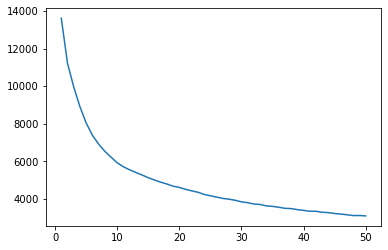

In [25]:
plt.plot(clusters, losses)
plt.show()

(0.0, 20.0)

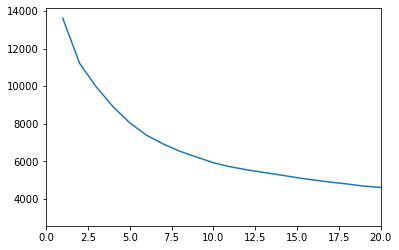

In [26]:
plt.plot(clusters, losses)
plt.xlim([0,20])

In [27]:
df_customer.head(10)

,distance_km,duration_sec,speed_kmh,start_distance_center,end_distance_center,start_hour,weekday_start
4,1.204496,439.0,9.877414,2.422933,3.524197,18,6
5,1.130541,470.0,8.659460,3.310986,3.751808,10,0
6,1.130541,431.0,9.443031,3.751808,3.310986,17,0
8,0.619573,384.0,5.808495,5.372953,5.225917,16,1
12,0.794214,388.0,7.368998,1.688254,2.165064,18,2
17,1.836496,739.0,8.946393,3.994299,5.496645,7,4
37,0.949410,316.0,10.816065,2.851432,3.751808,13,3
50,1.399320,853.0,5.905687,2.811224,1.688254,15,1
53,0.961808,259.0,13.368757,4.603799,5.505452,15,2
61,1.701679,695.0,8.814454,5.505452,6.867309,7,5


In [28]:
# four_means = KMeans(n_clusters=4)
# four_means.fit(XC_scaled)
# df_C_scaled["clusters"] = four_means.predict(XC_scaled)
# df_C_scaled["clusters"] = df_C_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_C_scaled, hue="clusters")

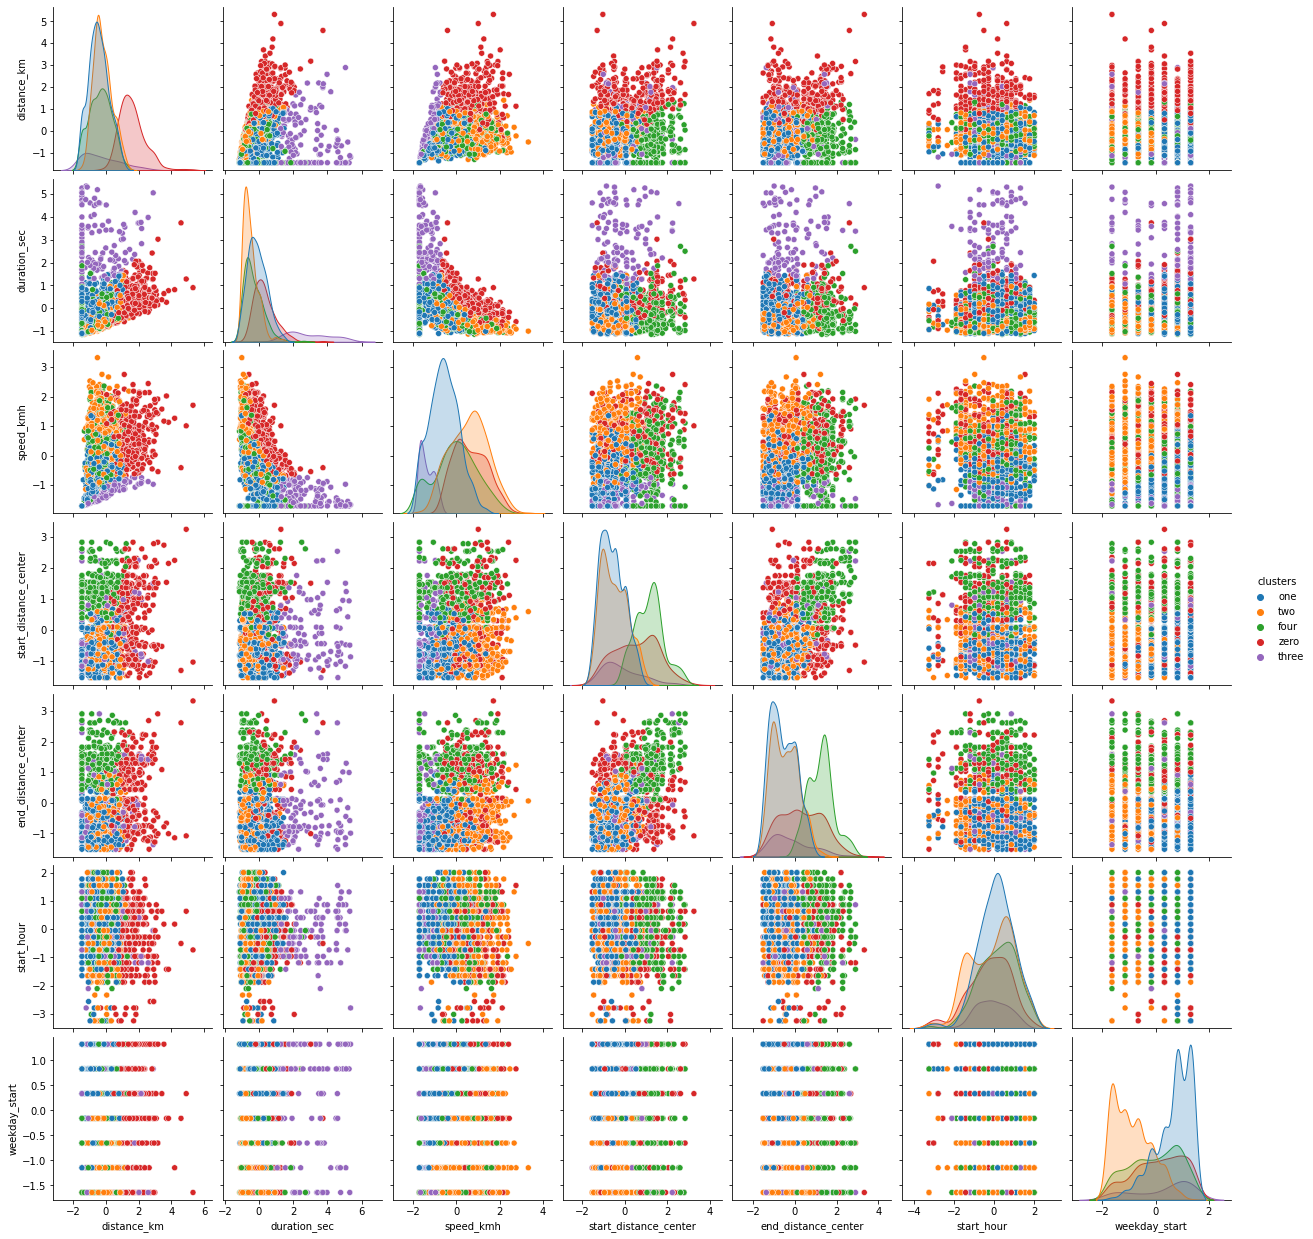

In [29]:
five_means = KMeans(n_clusters=5)
five_means.fit(XC_scaled)
df_C_scaled["clusters"] = five_means.predict(XC_scaled)
df_C_scaled["clusters"] = df_C_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_C_scaled, hue="clusters")

In [30]:
# six_means = KMeans(n_clusters=6)
# six_means.fit(XC_scaled)
# df_C_scaled["clusters"] = six_means.predict(XC_scaled)
# df_C_scaled["clusters"] = df_C_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_C_scaled, hue="clusters")

#### Subscriber Cluster

In [31]:
XS = df_subscriber

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(XS)
XS_scaled = scaler.transform(XS)

# create a df out of array
XS_scaled_df = pd.DataFrame(XS_scaled, columns=XS.columns, index=XS.index)
XS_scaled_df.head(10)

,distance_km,duration_sec,speed_kmh,start_distance_center,end_distance_center,start_hour,weekday_start
0,-1.017990,-0.864509,-0.464687,0.261116,0.371293,0.260301,0.732165
1,-1.003345,-1.010230,0.631568,0.502038,0.371293,-1.186219,1.276183
2,1.551434,0.751837,0.547309,0.488190,-1.322242,0.673592,1.276183
3,-0.729253,-0.690028,-0.084695,0.364805,-0.158910,-0.566282,1.820201
7,-0.764208,-0.573068,-0.608720,0.891528,0.371293,-0.979573,-0.899889
9,-0.867457,-0.678524,-0.610057,0.846972,1.285127,1.500175,-0.899889
10,-1.176354,-0.920113,-0.999263,-0.110629,-0.158910,-0.772928,-0.355871
11,-0.869088,-0.937370,0.772371,-0.167499,0.268013,0.466946,-0.355871
13,-0.826290,-0.981469,1.454618,1.610396,1.285127,-1.392865,0.188147
14,0.189038,-0.450356,1.560427,0.440059,1.611969,-0.772928,0.188147


In [33]:
df_S_scaled = XS_scaled_df

In [34]:
k_max = 50  # We have 147 datapoints, more than 50 clusters are definitely not reasonable!

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(XS_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

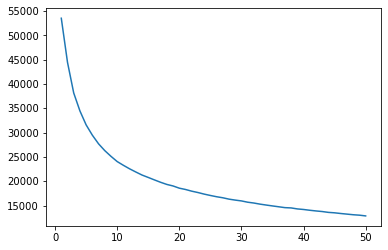

In [35]:
plt.plot(clusters, losses)
plt.show()

(0.0, 20.0)

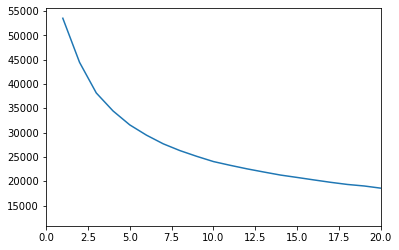

In [36]:
plt.plot(clusters, losses)
plt.xlim([0,20])

In [37]:
df_subscriber.head(10)

,distance_km,duration_sec,speed_kmh,start_distance_center,end_distance_center,start_hour,weekday_start
0,0.628436,265.0,8.537240,3.568588,3.751808,15,4
1,0.645929,189.0,12.303412,3.994299,3.751808,8,5
2,3.697625,1108.0,12.013944,3.969831,0.747467,17,5
3,0.973334,356.0,9.842702,3.751808,2.811224,11,6
7,0.931580,417.0,8.042417,4.682531,3.751808,9,1
9,0.808248,362.0,8.037824,4.603799,5.372953,21,1
10,0.439269,236.0,6.700711,2.911715,2.811224,10,2
11,0.806300,227.0,12.787140,2.811224,3.568588,16,2
13,0.857423,204.0,15.130991,5.952773,5.372953,7,3
14,2.070237,481.0,15.494498,3.884783,5.952773,10,3


In [38]:
# four_means = KMeans(n_clusters=4)
# four_means.fit(XS_scaled)
# df_S_scaled["clusters"] = four_means.predict(XS_scaled)
# df_S_scaled["clusters"] = df_S_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_S_scaled, hue="clusters")

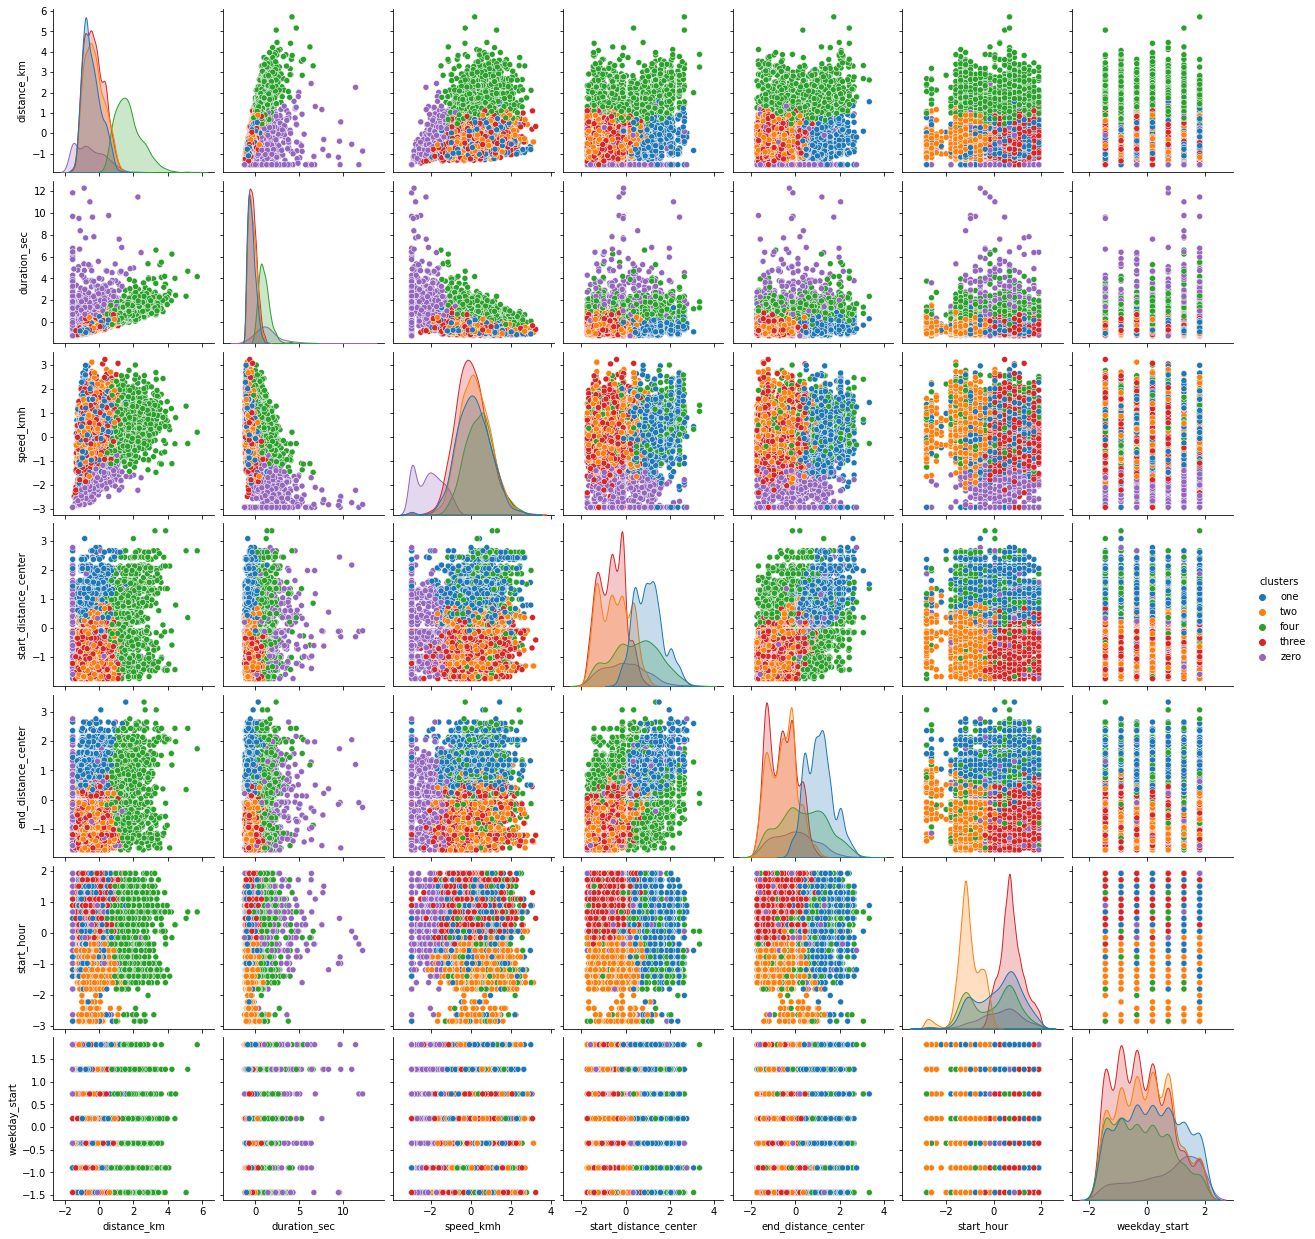

In [39]:
five_means = KMeans(n_clusters=5)
five_means.fit(XS_scaled)
df_S_scaled["clusters"] = five_means.predict(XS_scaled)
df_S_scaled["clusters"] = df_S_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=df_S_scaled, hue="clusters")

In [40]:
# six_means = KMeans(n_clusters=6)
# six_means.fit(XS_scaled)
# df_S_scaled["clusters"] = six_means.predict(XS_scaled)
# df_S_scaled["clusters"] = df_S_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_S_scaled, hue="clusters")